# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from MCForecastTools import MCSimulation

%matplotlib inline

#constants
NTD = 252 #number of trading days
NUM_SIMS = 500  #number of simulations

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()
# Fetch current ETH price
# YOUR CODE HERE!]
btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15636.37
The current value of your 5.3 ETH is $2209.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")
#type(api_key)
# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
    api_key,
    secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
#to make date dynamic
dt_today = datetime.datetime.today().strftime("%Y-%m-%d")

today = pd.Timestamp(dt_today, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

# YOUR CODE HERE!
df_stocks = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_stocks.head()

AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.39  3564677  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.04  340.65  344.35  33129894

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_closing = df_stocks["AGG"]["close"][0]
spy_closing = df_stocks["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing}")
print(f"Current SPY closing price: ${spy_closing}")

Current AGG closing price: $117.39
Current SPY closing price: $344.35


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_closing * my_agg
my_spy_value = spy_closing * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17217.50
The current value of your 200 AGG shares is $23478.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings = {"amount": [(my_eth_value + my_btc_value),
                     (my_agg_value + my_spy_value)]
}

df_savings = pd.DataFrame(data = savings, index = ["crypto","shares"])

print(df_savings)


          amount
crypto  17845.73
shares  40695.50


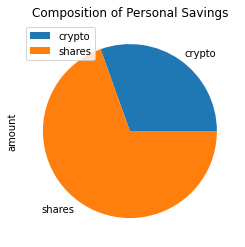

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", y = "amount", title = "Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings =sum(df_savings["amount"])

# Validate saving health
# YOUR CODE HERE!
savings_health = (total_savings - emergency_fund)
if savings_health >0:
    print(f'Congratulations!  You have enough money in your emergency fund, '
          f'and ${savings_health:0.2f} more than required')
elif savings_health == 0:
    print(f'Congratulations, you have exactly enough in your emergency fund')
else:
    print(f'Keep saving!  You need ${savings_health:0.2f} more in your emergency fund')

Congratulations!  You have enough money in your emergency fund, and $22541.23 more than required


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
yrs = 5
num_days = NTD* yrs 

#dynamic dates
dt_today = datetime.datetime.today().date()
dt_less_5yrs = dt_today - datetime.timedelta(days = num_days)
                                             
#print(dt_start)
start_date = pd.Timestamp(str(dt_less_5yrs), tz='America/New_York').isoformat()
end_date = pd.Timestamp(str(dt_today), tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                              SPY                                      
                             open    high     low    close     volume  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
yrs = 30
num_days = NTD * yrs

# Print the simulation input data
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = NUM_SIMS,
    num_trading_days = num_days
)


In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_sim.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993700,0.982233,0.990897,1.010481,0.997313,0.995001,0.985998,1.010923,0.986817,0.999707,...,0.988373,1.001993,0.995218,0.990934,0.998340,1.003711,0.981991,0.994591,0.998070,1.007195
2,1.003446,0.980042,0.990168,1.011995,1.002877,0.995256,0.992116,0.995821,1.000951,0.997694,...,0.969331,1.014530,0.990236,0.989060,1.010740,1.009908,0.987875,0.988695,0.997983,1.005121
3,1.001306,0.971345,0.993048,1.024066,0.980926,0.985165,1.000092,0.989156,1.007065,1.017143,...,0.962179,1.009827,0.984569,0.991979,1.006890,1.004449,0.997369,0.991973,0.999410,0.993921
4,1.006456,0.971128,0.991345,1.020530,0.989304,0.984078,0.986461,0.998168,1.003160,1.009303,...,0.972481,0.990204,0.991378,0.981734,0.989980,1.001795,0.996222,0.996466,1.006501,0.985651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.958892,11.064459,9.009037,12.932964,6.099356,13.824953,27.821245,8.003336,49.168248,3.233434,...,9.376982,2.867682,14.175561,19.334923,8.128644,13.480418,11.715669,20.456444,0.708226,5.056249
7557,4.943880,11.002180,8.939989,13.036861,6.059322,13.843757,27.808634,7.960468,49.606651,3.209054,...,9.329668,2.848061,14.083311,19.304988,8.170061,13.473716,11.841606,20.597925,0.706535,5.014240
7558,4.894116,11.034214,8.872424,13.076874,6.111576,13.712803,27.826830,8.064994,49.628852,3.218411,...,9.228775,2.859274,14.328733,19.478349,8.202662,13.542650,11.589947,20.471169,0.718920,5.028519
7559,4.858815,11.147024,8.930059,13.126431,6.095345,13.818931,28.037825,7.966729,50.005928,3.160871,...,9.026765,2.873212,14.203834,19.424329,8.253747,13.463932,11.667277,20.474778,0.718591,5.044333


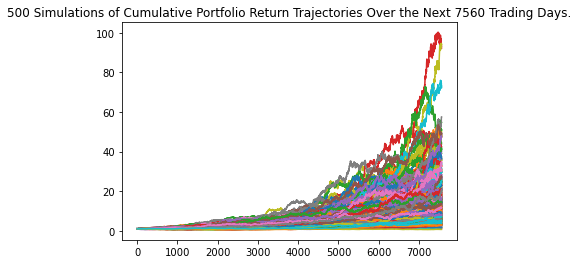

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_sim.plot_simulation()

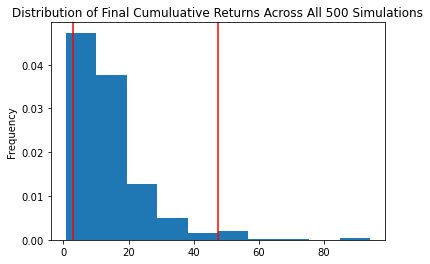

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_sim.plot_distribution()


### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_sim.summarize_cumulative_return()
# Print summary statistics
print(stats)
# YOUR CODE HERE!

count           500.000000
mean             14.135952
std              11.457474
min               0.719016
25%               6.589854
50%              11.144193
75%              17.135573
max              94.135227
95% CI Lower      2.829872
95% CI Upper     47.433044
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats[8] * initial_investment,2)
ci_upper = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next \n30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 
30 years will end within in the range of $56597.43 and $948660.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment *= 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(stats[8] * initial_investment,2)
ci_upper = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next \n30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 
30 years will end within the range of $84896.15 and $1422991.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
yrs = 5
num_days = NTD * yrs #total days back

dt_today = datetime.datetime.today().date()
dt_plus_5yrs = dt_today + datetime.timedelta(days = num_days)

start_date = pd.Timestamp(str(dt_today), tz= "America/New_York").isoformat()
end_date = pd.Timestamp(str(dt_plus_5yrs), tz='America/New_York').isoformat()

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = NUM_SIMS,
    num_trading_days = num_days
)

MC_five_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979554,1.000682,1.008841,0.982295,1.005834,1.000619,1.003814,0.996925,0.980379,0.997092,...,0.988967,1.015743,1.004144,1.018275,0.998728,1.001974,0.982024,1.008410,0.994087,0.987599
2,0.985271,1.007379,1.020970,0.979950,1.010905,1.006235,1.014802,1.008490,0.998375,1.009081,...,0.989637,1.006821,0.983924,1.001726,0.982838,1.013773,0.984001,1.034351,0.999576,0.976586
3,0.973970,1.008427,1.050179,0.982524,1.006426,0.995197,1.024234,1.015301,1.009803,1.022128,...,0.973329,1.004820,0.981171,1.000289,0.990145,1.023574,0.997240,1.016001,1.023352,0.985431
4,0.979754,1.007267,1.055257,0.984997,1.009455,1.031087,1.041447,1.016785,1.006183,1.017306,...,0.973917,0.995957,0.978863,0.993132,0.998263,1.036657,0.990098,1.031480,1.032441,0.982818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.110785,0.968989,1.649205,3.841781,1.646323,1.661961,1.735296,2.260114,2.321660,3.329131,...,1.287416,2.023979,1.056799,1.336552,1.107684,2.006956,2.689625,1.026788,2.875230,2.227786
1257,3.061100,0.972949,1.627129,3.843228,1.661437,1.687354,1.733541,2.271767,2.291046,3.408095,...,1.264390,2.036908,1.051824,1.328738,1.116051,2.041151,2.668260,1.027815,2.901131,2.228924
1258,3.053296,0.972948,1.630865,3.847020,1.671517,1.700079,1.748231,2.311847,2.303442,3.351721,...,1.266770,2.046387,1.049489,1.348035,1.100429,2.046881,2.614740,1.032646,2.877790,2.241837
1259,3.114432,0.974686,1.618379,3.787319,1.670009,1.662262,1.734543,2.295513,2.340915,3.354308,...,1.261291,2.067403,1.043872,1.357928,1.114347,2.059536,2.638402,1.055426,2.847967,2.198147


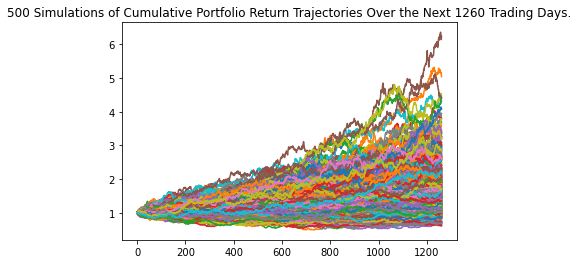

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_year.plot_simulation()

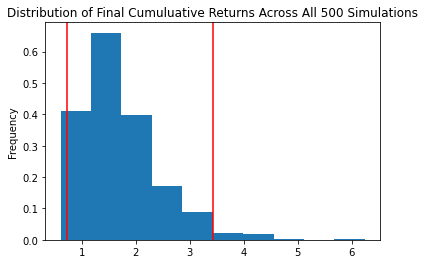

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean              1.725040
std               0.736633
min               0.608974
25%               1.213193
50%               1.607842
75%               2.055101
max               6.243895
95% CI Lower      0.731611
95% CI Upper      3.423731
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 40000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stats[8] * initial_investment,2)
ci_upper_five = round(stats[9] * initial_investment,2) 
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next \n5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 
5 years will end within in the range of $29264.43 and $136949.25


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_days = (365 * 10) + 2
dt_today = datetime.datetime.today().date()
dt_plus_10yrs = dt_today + datetime.timedelta(days = num_days)


start_date = pd.Timestamp(str(dt_today),tz = "America/New_York").isoformat()
end_date = pd.Timestamp(str(dt_plus_10yrs),tz = "America/New_York").isoformat()


MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1 ,0.9],
    num_trading_days = num_days,
    num_simulation = NUM_SIMS
)

MC_ten_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001463,0.993150,0.998294,0.995007,1.003008,1.000740,1.003288,0.999680,0.977664,0.982447,...,1.007621,0.989927,0.980182,1.003381,1.013064,1.013827,1.023363,1.001576,0.996395,1.003500
2,0.992632,1.000245,0.999125,1.015273,1.020005,1.018616,0.993444,0.999088,0.973231,0.972955,...,1.015846,0.981828,0.971737,0.994326,1.024214,0.992147,1.016007,0.976835,0.989438,0.992536
3,0.991507,1.003666,1.000569,1.008867,1.024289,1.011574,0.981311,0.993641,0.972749,0.971584,...,1.031242,0.994190,0.970024,0.984170,1.035094,1.005184,1.036569,0.965263,0.978469,0.977132
4,1.013242,0.976349,0.987984,1.008328,1.012614,0.991349,0.973829,0.993822,0.961161,0.979891,...,1.030049,1.008258,0.984476,0.957219,1.043103,1.006022,1.046667,0.974344,0.987491,0.962407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4.637607,6.449778,7.084570,5.079679,1.104236,10.836719,5.076717,0.819640,4.883799,6.872489,...,5.250095,2.532177,4.828444,7.194452,8.623708,3.696036,2.190898,9.896374,1.795368,3.037283
3649,4.721673,6.521940,7.090299,5.090225,1.100844,10.859390,5.048136,0.804629,4.791770,6.948404,...,5.226528,2.552147,4.779062,7.441092,8.484063,3.631011,2.159009,9.687192,1.793866,3.015199
3650,4.599571,6.522520,7.122437,5.107958,1.104375,10.925630,5.182586,0.801295,4.831204,6.807236,...,5.261619,2.575389,4.802227,7.295331,8.551313,3.624393,2.155399,9.734489,1.815979,2.931857
3651,4.586649,6.565979,7.186277,5.080896,1.105943,10.940456,5.215628,0.814337,4.889248,6.903045,...,5.379752,2.592662,4.799521,7.480056,8.393142,3.703102,2.148819,9.664475,1.822142,2.877606


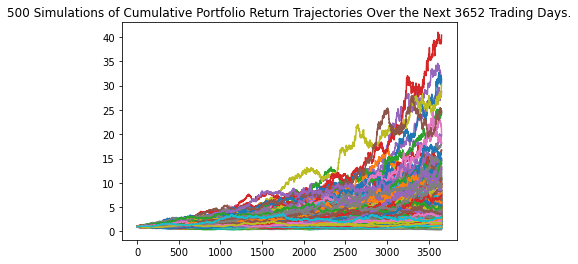

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten_year.plot_simulation()

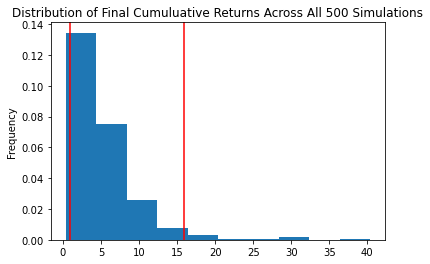

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_ten_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean              5.246345
std               4.533997
min               0.371364
25%               2.401493
50%               3.986005
75%               6.654345
max              40.369181
95% CI Lower      0.958656
95% CI Upper     15.849791
Name: 3652, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 25000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stats[8] * initial_investment,2)
ci_upper_ten = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next \n10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 
10 years will end within in the range of $23966.41 and $396244.78
